In [3]:
pip install music21


     |████████████████████████████████| 18.4MB 7.6MB/s eta 0:00:01    |█████████▊                      | 5.6MB 2.8MB/s eta 0:00:05
  Created wheel for music21: filename=music21-5.7.1-cp37-none-any.whl size=22004201 sha256=970e36a26442b1047830ca7f7e3d06bd9581bb0f8a32b0534f2115b5744660ab
  Stored in directory: /Users/weiliang/Library/Caches/pip/wheels/e6/8c/9f/d7b44d27193b267fe09ec7af27289ac7babccdc111335f9df6
Successfully built music21
Note: you may need to restart the kernel to use updated packages.


In [18]:
from music21 import converter, chord, note, volume

# Getting the data

You can find midi files for each of the 36 movements in the J.S. Bach Cello Suites here:

http://www.jsbach.net/midi/midi_solo_cello.html

Save these inside the './data/cello' folder

# Musical notation software

You'll also need to download some software to view and listen to the music generated by the model.

Musescore can be freely downloaded here:

https://musescore.org/en

# Viewing the data

In [3]:
dataset_name = 'jazz'
composer_name = 'CharlieParker'
filename = 'CharlieParker_BluesForAlice_FINAL'
file = "./data/{}/{}/{}.mid".format(dataset_name, composer_name, filename)

original_score = converter.parse(file).chordify()

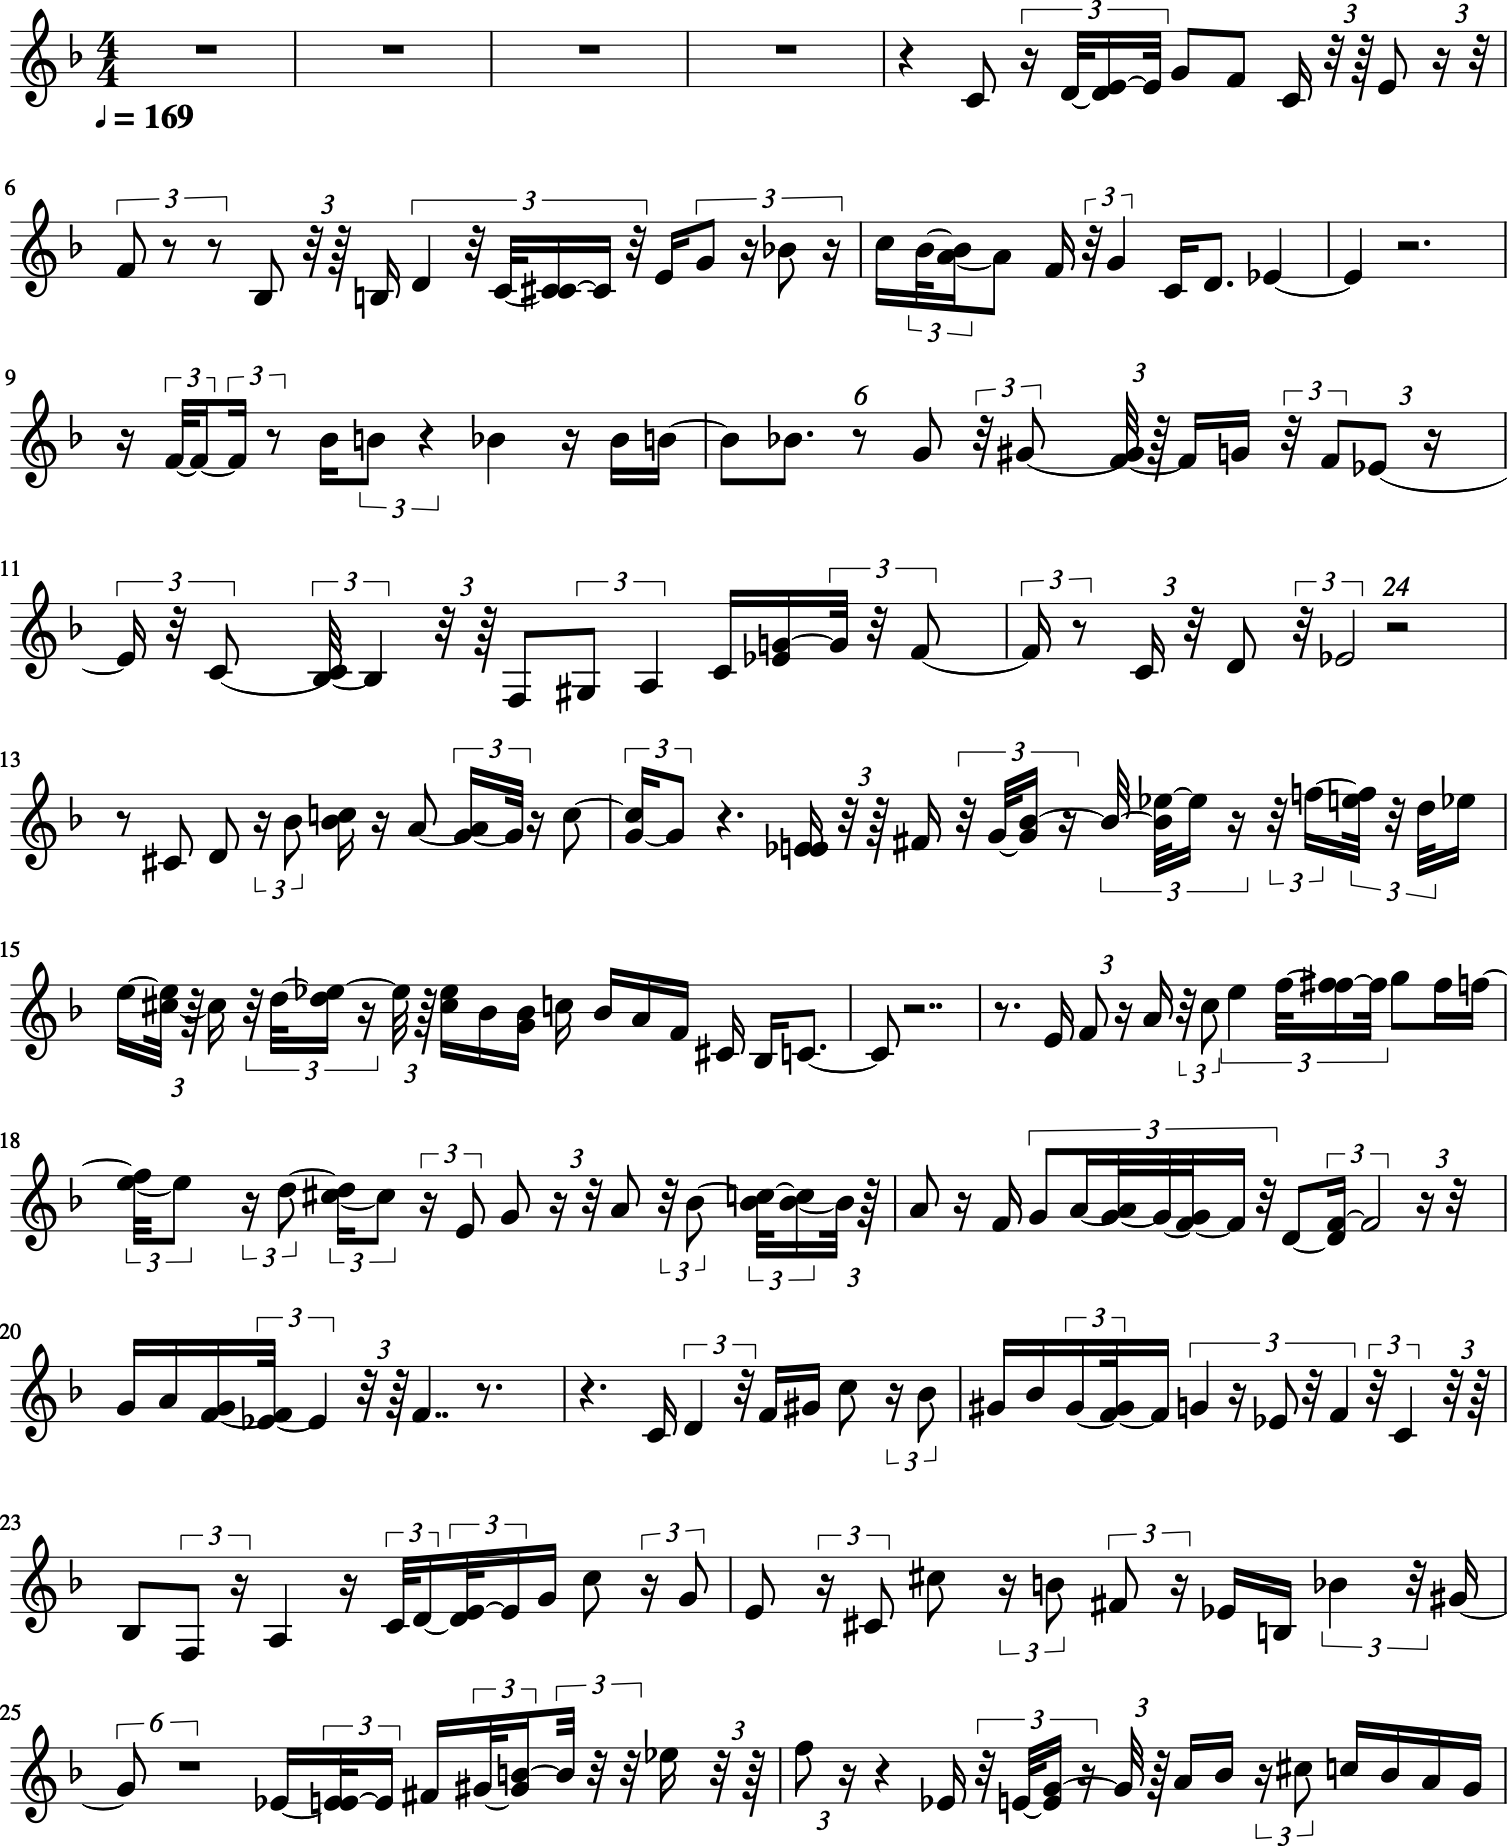

In [4]:
original_score.show()

In [5]:
original_score.show('text')

{0.0} <music21.tempo.MetronomeMark vivacissimo Quarter=169.0>
{0.0} <music21.key.Key of F major>
{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.note.Rest rest>
{17.0} <music21.chord.Chord C4>
{17.5} <music21.note.Rest rest>
{17.6667} <music21.chord.Chord D4>
{17.75} <music21.chord.Chord D4 E4>
{17.9167} <music21.chord.Chord E4>
{18.0} <music21.chord.Chord G4>
{18.5} <music21.chord.Chord F4>
{19.0} <music21.chord.Chord C4>
{19.25} <music21.note.Rest rest>
{19.3333} <music21.chord.Chord E4>
{19.8333} <music21.note.Rest rest>
{20.0} <music21.chord.Chord F4>
{20.3333} <music21.note.Rest rest>
{20.6667} <music21.chord.Chord B-3>
{21.1667} <music21.note.Rest rest>
{21.25} <music21.chord.Chord B3>
{21.5} <music21.chord.Chord D4>
{22.1667} <music21.note.Rest rest>
{22.25} <music21.chord.Chord C4>
{22.3333} <music21.chord.Chord C4 C#4>
{22.5} <music21.chord.Chord C#4>
{22.6667} <music21.note.Rest rest>
{22.75} <music21.chord.Chord E4>
{23.0} <music21.chord.Chord G4>
{23.3333} <music21.n

In [17]:
original_score.flat[90].volume.velocity

116

# Extracting the data

In [20]:
notes = []
durations = []
velocities = []

for element in original_score.flat:
    
    if isinstance(element, chord.Chord):
        notes.append('.'.join(n.nameWithOctave for n in element.pitches))
        durations.append(element.duration.quarterLength)
        velocities.append(element.volume.velocity)

    if isinstance(element, note.Note):
        if element.isRest:
            notes.append(str(element.name))
            durations.append(element.duration.quarterLength)
            velocities.append(element.volume.velocity)
        else:
            notes.append(str(element.nameWithOctave))
            durations.append(element.duration.quarterLength)
            velocities.append(element.volume.velocity)
            
    

In [22]:
print('\nduration', 'pitch', 'intensity')
for n,d,v in zip(notes,durations, velocities):
    print(d, '\t', n, '\t', v)


duration pitch intensity
0.5 	 C4 	 106
1/12 	 D4 	 109
1/6 	 D4.E4 	 110
1/12 	 E4 	 110
0.5 	 G4 	 116
0.5 	 F4 	 122
0.25 	 C4 	 98
0.5 	 E4 	 115
1/3 	 F4 	 117
0.5 	 B-3 	 89
0.25 	 B3 	 98
2/3 	 D4 	 116
1/12 	 C4 	 88
1/6 	 C4.C#4 	 100
1/6 	 C#4 	 111
0.25 	 E4 	 110
1/3 	 G4 	 116
1/3 	 B-4 	 122
0.25 	 C5 	 111
1/12 	 B-4 	 117
1/6 	 A4.B-4 	 118
0.5 	 A4 	 119
0.25 	 F4 	 94
2/3 	 G4 	 119
0.25 	 C4 	 94
0.75 	 D4 	 114
2.0 	 E-4 	 90
1/12 	 F4 	 123
1/6 	 F4 	 123
1/6 	 F4 	 123
0.25 	 B-4 	 111
1/3 	 B4 	 119
1.0 	 B-4 	 116
0.25 	 B-4 	 119
0.75 	 B4 	 114
0.75 	 B-4 	 121
0.5 	 G4 	 120
5/12 	 G#4 	 115
1/12 	 F4.G#4 	 116
0.25 	 F4 	 118
0.25 	 G4 	 114
1/3 	 F4 	 114
0.5 	 E-4 	 112
5/12 	 C4 	 106
1/12 	 B-3.C4 	 104
2/3 	 B-3 	 103
0.5 	 F3 	 106
1/3 	 G#3 	 115
2/3 	 A3 	 113
0.25 	 C4 	 107
0.25 	 E-4.G4 	 120
1/12 	 G4 	 121
0.5 	 F4 	 120
1/6 	 C4 	 107
0.5 	 D4 	 115
4/3 	 E-4 	 100
0.5 	 C#4 	 118
0.5 	 D4 	 114
1/3 	 B-4 	 120
0.25 	 B-4.C5 	 108
0.5 	 A4 	 1